In [12]:
import pgeocode
import pandas as pd
nomi = pgeocode.Nominatim('us')
#nomi.query_postal_code("16002")['state_code']
s = pd.read_csv('manoa_zip.csv')
s.rename(columns={'Unnamed: 0':'STATE'}, inplace=True)
s

,STATE,SPRADDR_ZIP_PR
0,96822,256
1,96816,242
2,96789,216
3,96826,204
4,96817,203
...,...,...
5704,16002,1
5705,10400,1
5706,07722,1
5707,11954,1


In [13]:
for value in range(len(s.index)):
    s.at[value, 'STATE'] = nomi.query_postal_code(s.at[value, 'STATE'])['state_code']

In [30]:
zip_code_summary = s

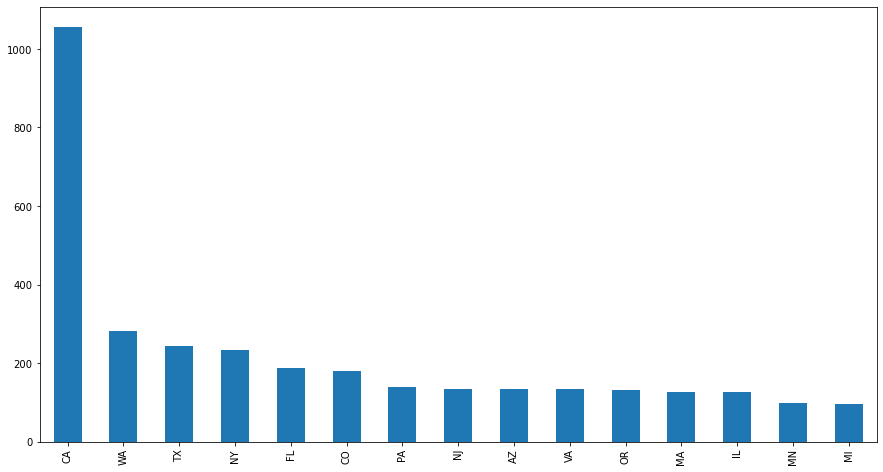

In [31]:
zip_code_summary = zip_code_summary['STATE'].value_counts()
zip_code_summary = zip_code_summary.drop('HI')
zip_code_summary = zip_code_summary.drop(zip_code_summary.index[range(15,51)])
zip_code_summary.plot(kind='bar', figsize=(15,8))

In [32]:
zip_code_summary

CA    1055
WA     282
TX     243
NY     232
FL     188
CO     180
PA     140
NJ     135
AZ     135
VA     133
OR     132
MA     126
IL     125
MN      99
MI      95
Name: STATE, dtype: int64

In [34]:
zip_code_summary.to_csv('zip_code_summary.csv')